In [1]:
import math
from random import random

class Position:
    def __init__(self, x=None, y=None, z=None):
        self.x = x if x is not None else random()
        self.y = y if y is not None else random() 
        self.z = z if z is not None else random()
        
    def __add__(self, other):
        x = self.x + other.x
        y = self.y + other.y
        z = self.z + other.z
        
        return Position(x=x, y=y, z=z)
    
    def __sub__(self, other):
        x = self.x - other.x
        y = self.y - other.y
        z = self.z - other.z
        
        return Position(x=x, y=y, z=z)
    
    def __abs__(self):
        a = Position(
            x=abs(self.x),
            y=abs(self.y),
            z=abs(self.z)
        )
        
        return a
    
    def __mul__(self, other):
        if isinstance(other, Position):
            return Position(
                other.x * self.x,
                other.y * self.y,
                other.z * self.z
            )
        
        else:
            return Position(
                x=self.x * other,
                y=self.y * other,
                z=self.z * other
            )
        
    def __truediv__(self, other):
        if isinstance(other, Position):
            return Position(
                x=self.x / other.x,
                y=self.y / other.y,
                z=self.z / other.z
            )
        else:
            return Position(
                x=self.x / other,
                y=self.y / other,
                z=self.z / other
            )
        
    def show(self):
        return (self.x, self.y, self.z)
    
    
class Vertex:
    id = 0
    
    def __init__(self, pos=Position()):
        self.id = Vertex.id
        Vertex.id += 1
        
        self.position = pos
    
class Edge:
    def __init__(self, source, target):
        self.source = source
        self.target = target
        
    def show(self):
        return (self.source.id, self.source.position.show(), self.target.id, self.target.position.show() )
    
def generateV(n):
    result = []
    for i in range(n):
        result.append(Vertex(pos=Position()))
        
    return result

from random import choice
def generateE(n, V):
    result = []
    for i in range(n):
        result.append(Edge(choice(V), choice(V)))

    return result
        
class Settings:
    K = Position(x=random(), y=random(), z=random())
    eps = Position(x=random(), y=random(), z=random())
    rep = Position(x=random(), y=random(), z=random())

In [2]:
V = generateV(10)
E = generateE(7, V)

In [3]:
print([(v.id, v.position.show()) for v in V])
print([(e.source.id, e.target.id) for e in E])

[(0, (0.7598097482532461, 0.6811887952919085, 0.21197729023426726)), (1, (0.7039758097216428, 0.0941665206794815, 0.06038275716037245)), (2, (0.20514657727695218, 0.3842239555995849, 0.06398167023605938)), (3, (0.014231809909293625, 0.5408107483715459, 0.5859380860741737)), (4, (0.8257528617312253, 0.512739388486035, 0.7528485751641432)), (5, (0.21634992070139047, 0.6680710250083056, 0.1218088224958439)), (6, (0.9713914552084097, 0.15488101409251787, 0.21742780553607488)), (7, (0.3603361931621317, 0.15125959235061714, 0.4982945555119903)), (8, (0.2886911817510823, 0.6444320041191512, 0.7770444019667674)), (9, (0.3957378643995233, 0.7334141950755056, 0.8667340633981746))]
[(1, 5), (5, 6), (0, 9), (5, 6), (5, 1), (9, 2), (8, 9)]


In [4]:
def spring_potential(V, E, settings):
    s = Position(x=0.0, y=0.0, z=0.0)
    for edge in E:
        source = edge.source
        target = edge.target
        
        s += (abs(source.position - target.position) * Position(0.5, 0.5, 0.5) * settings.K) * (
            (source.position - target.position) * Position(0.5, 0.5, 0.5) * settings.K)
        
    return s

def repulsion_potential(V, E, settings):
    s = Position(x=0.0, y=0.0, z=0.0)
    for v in V:
        for u in V:
            if u is not v:
                s += (abs(v.position - u.position + settings.eps) * (Position(x=1.0, y=1.0, z=1.0) / settings.rep))
                
    return s


## Live Testing spring_potential

In [5]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def f(x):
    Settings.K = x
    return spring_potential(V, E, Settings).show()

display(interact(f, x=0.5))

interactive(children=(FloatSlider(value=0.5, description='x', max=1.5, min=-0.5), Output()), _dom_classes=('wi…

<function __main__.f(x)>

## Live Testing repulsion_potential

In [6]:
def g(x):
    Settings.rep = x
    return repulsion_potential(V, E, Settings).show()

display(interact(g, x=0.5))

interactive(children=(FloatSlider(value=0.5, description='x', max=1.5, min=-0.5), Output()), _dom_classes=('wi…

<function __main__.g(x)>

In [7]:
def h(rep, k):
    Settings.rep = rep
    Settings.K = k
    return (
        'RP: ', repulsion_potential(V, E, Settings).show(),
        'SP: ', spring_potential(V, E, Settings).show()
    )

display(interact(h, rep=0.5, k=0.5))

interactive(children=(FloatSlider(value=0.5, description='rep', max=1.5, min=-0.5), FloatSlider(value=0.5, des…

<function __main__.h(rep, k)>

## Sprinkling in matplotlib

In [8]:
import matplotlib.pyplot as plt

In [9]:
Vs = generateV(50)
Es = generateE(15, Vs)

print(spring_potential(Vs, Es, Settings).show())
print(repulsion_potential(Vs, Es, Settings).show())

(-0.08720786926279189, 0.06722238848612255, -0.0116274071463704)
(2713.444478815094, 1728.9926020800876, 1804.1067922766754)


### Plotting Data

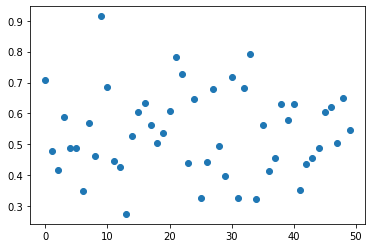

In [10]:
vsx = list(map(lambda v: v.position.x, Vs))
vsy = list(map(lambda v: v.position.y, Vs))
vsz = list(map(lambda v: v.position.z, Vs))

vsavg = [(vsx[i] + vsy[i] + vsz[i]) / 3 for i in range(len(vsx))]

# plt.plot(vsx, 'ro')
# plt.plot(vsy, 'go')
# plt.plot(vsz, 'bo')

plt.scatter(range(len(vsx)), vsavg)
plt.show()

In [11]:
sum(vsavg)

26.985766922645603

In [12]:
a = sum(vsavg) / len(vsavg)
a

0.5397153384529121

In [13]:
plt.scatter(, 100)
plt.show()

SyntaxError: invalid syntax (799132526.py, line 1)

In [ ]:
plt.bar??

## Combining Live Variables and Plot

In [ ]:
vals = []
effects = {
    'name': [],
    'x': [],
    'on': []
}
last = None
    
    
def vis(rep, k):
    Settings.rep = rep
    Settings.K = k

    vals.append({
        'rep': Settings.rep,
        'K': Settings.K,
        'RP': repulsion_potential(Vs, Es, Settings),
        'SP': spring_potential(Vs, Es, Settings)
    })
    
    reps = [r['rep'] for r in vals]
    ks = [r['K'] for r in vals]
    rp = [r['RP'] for r in vals]
    sp = [r['SP'] for r in vals]
    
    plt.bar(range(len(ks)), ks)
    
display(interact(vis, rep=0.5, k=0.5))

In [ ]:
def T(vs, es, settings):
    s = Position(x=0.0, y=0.0, z=0.0)
    for v in vs:
        s += Position(x=0.5, y=0.5, z=0.5) * (abs(v.position)*abs(v.position))
    
    return s

In [ ]:
T(Vs, Es, Settings).show()

In [ ]:
def V(vs, es, settings):
    return spring_potential(vs, es, settings) + repulsion_potential(vs, es, settings)

In [ ]:
def L(vs, es, settings):
    return T(vs, es, settings) - V(vs, es, settings)

In [ ]:
print(L(Vs, Es, Settings).show())
print(T(Vs, Es, Settings).show())
print(V(Vs, Es, Settings).show())

In [ ]:
def single_level_dynamics(vs, es, settings):
    acceleration = Position(x=0.0, y=0.0, z=0.0)
    
    spring_s = Position(x=0.0, y=0.0, z=0.0)
    for v in vs:
        for u in vs:
            spring_s += ((settings.K * Position(x=-1.0, y=-1.0, z=-1.0)) * (v.position - u.position))

    repuls_s = Position(x=0.0, y=0.0, z=0.0)
    for v in vs:
        for u in vs:
            if v.id is not u.id:
                d = v.position - u.position
                repuls_s += (settings.rep / (settings.eps + d)*(settings.eps + d)) * (d / abs(d))
            
    acceleration = spring_s + repuls_s
    return acceleration

In [ ]:
single_level_dynamics(Vs, Es, Settings).show()